# Week 4:  Web Scraping and Text Classification

In this week's project we will be working with text data and getting an introduction to Natural Language Processing (NLP). For this, the plan is:
Today:
- scrape some text data using the `requests` library
- get useful information out of the HTML using RegEx (`re`). 

The rest of the week:Tuesday to Friday:
- use `BeautifulSoup` to parse HTML easily
- after colleting our corpus, preprocess and clean the text data
- turn the text data into machine readable numbers (Bag of Words and TF-IDF)
- run a classification algorithm to predict the label (Artist) from some input lyrics

Friday morning:

- We see a new classification algorithm that you can use for this week's task (Naive Bayes) and talk about class imbalance in machine learning. We will also look at refactoring your code into functions as it gets more complex.

## Web Scraping

### Warmup:


In groups, have a look at the [warm-up on the course materials page](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_lyrics/web_scraping/README.html)

### Web Scraping using `requests`

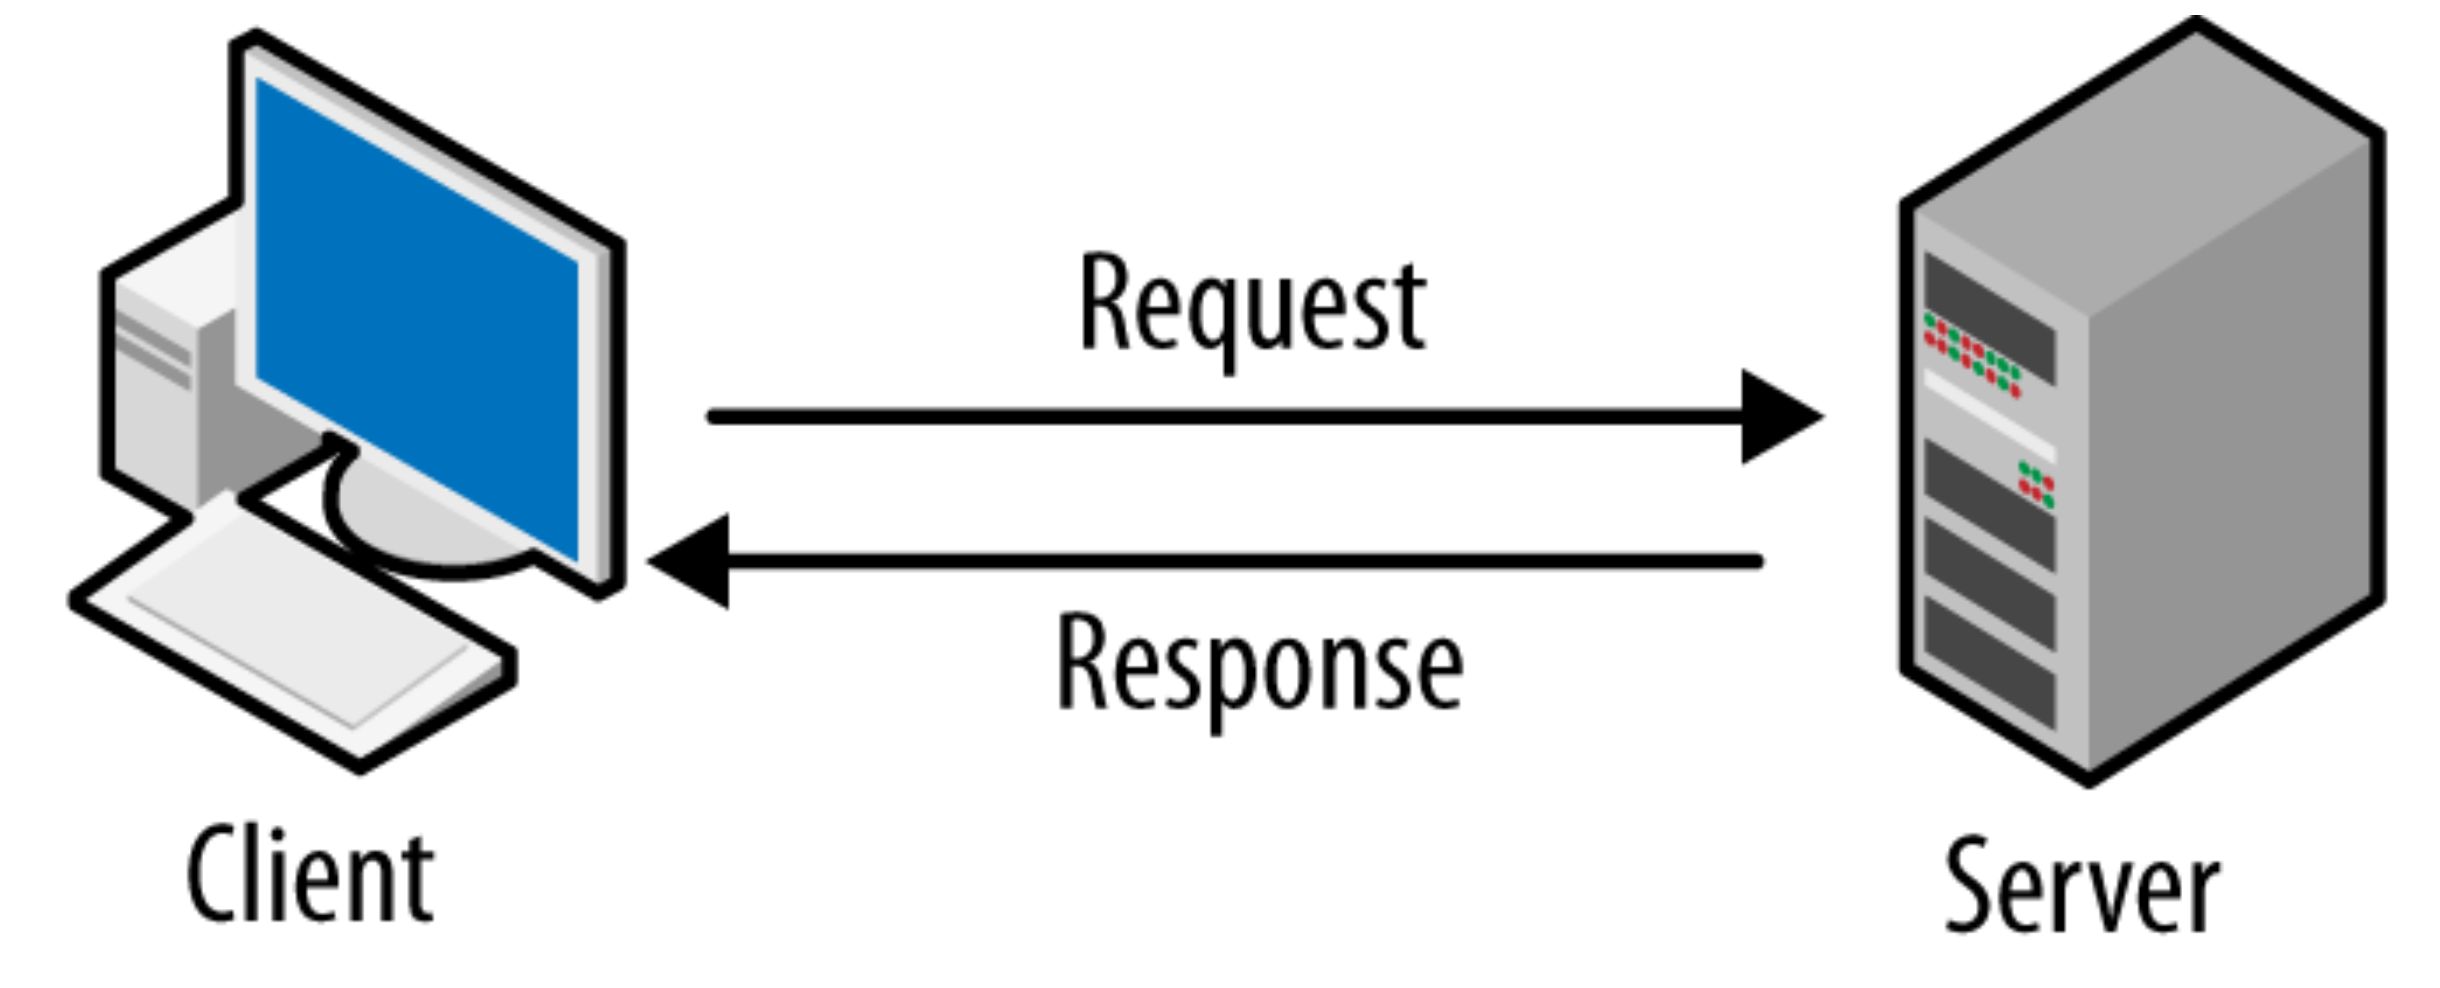
[image source](https://madooei.github.io/cs421_sp20_homepage/api/)

In [1]:
# !pip install requests
# or for conda:
# !conda install -c anaconda requests 

import requests

In [2]:
url = 'https://www.spiced-academy.com/'

In [3]:
response = requests.get(url)

In [4]:
response


<Response [200]>

200 is a response code. What does it mean?

* 200-range: successful
* 300-range: redirect
* 400-range: there was a problem with the client's request
* 500-range: there was a problem on the end of the server

See [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) for a list of what all the codes mean.

See also [418: I am a teapot](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/418)

In [5]:
response.status_code

200

The contents of the webpage are saved in the `.text` attribute.

In [6]:
spiced_html = response.text

In [7]:
spiced_html

'<!DOCTYPE html>\n<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" dir="ltr">\n\n<head>\n    <title>Your new career starts here | Spiced Academy</title>\r\n    <meta name="description" content="Kickstart your new career with our intensive, on-site tech programs in Web Development and Data Science.">\r\n    \r\n    <meta charset="UTF-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\r\n    <link href="https://fonts.googleapis.com/css?family=Poppins:300,400,600&display=swap" rel="stylesheet">\r\n    <link href="https://fonts.googleapis.com/css?family=IBM+Plex+Mono:400,500&display=swap" rel="stylesheet">\r\n    <link rel=\'stylesheet\' href=\'/css/main.css\'>\r\n    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png?v=3">\r\n    <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png?v=3">\r\n    <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png?v=3">\r\n    <link rel="mask

What is this output? How is it structured? How can we understand it?

###  Working with text files

`with open` - so you don't have to remember to close the file

modes:
- `"w"`- write / create
- `"r"` - read
- `"a"`- append

Write mode creates a file if it doesn't exist or overwrites it if it does:

In [8]:
with open('somefile.txt', "w") as f:
    f.write("blah blah blah")

NB. this syntax saves the file in the same directory you are. If you want to use a different folder use the following code:
`with open('path/to/my/file.txt')`
where the path can be relative or absolute. Relative paths are better as they will not change if somebody else is running your code.

Read mode is read only, you can read in a file and save it as a variable in your code or print it

In [9]:
with open('somefile.txt', "r") as f:
    my_string= f.read()

In [10]:
print(my_string)

blah blah blah


Append mode adds text to the end of a file without overwriting it.

In [11]:
with open("somefile.txt", "a") as f:
    #\n is a new line delimiter
    f.write('\n new line')

In [12]:
with open('somefile.txt', "r") as f:
    my_string= f.read()
    print(my_string)

blah blah blah
 new line


We can also save variables to a text file, eg. the text of a webpage:

In [13]:
with open ("spiced_html", "w") as f:
    f.write(spiced_html)

If we read it in again it saves us from having to download the webpage again.

In [14]:
with open ("spiced_html", 'r') as f:
    text= f.read()
    print(text)

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" dir="ltr">

<head>
    <title>Your new career starts here | Spiced Academy</title>
    <meta name="description" content="Kickstart your new career with our intensive, on-site tech programs in Web Development and Data Science.">
    
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <link href="https://fonts.googleapis.com/css?family=Poppins:300,400,600&display=swap" rel="stylesheet">
    <link href="https://fonts.googleapis.com/css?family=IBM+Plex+Mono:400,500&display=swap" rel="stylesheet">
    <link rel='stylesheet' href='/css/main.css'>
    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png?v=3">
    <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png?v=3">
    <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png?v=3">
    <link rel="mask-icon" href="/safari-pinned-tab.svg" color

### (Bonus!) Passing parameters

In [15]:
url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi'
param_dict = {'db':'pubmed', 'term':'escherichia', 'rettype':'uilist'}


In [16]:
response = requests.get(url, params=param_dict)

In [17]:
response.url

'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=escherichia&rettype=uilist'

### (Bonus!) Post a form


In [28]:
url = 'http://www.genesilico.pl/rnapathwaysdb/search/keyword/'
form_values = {'query': 'trna'}

In [29]:
response = requests.post(url, form_values)

In [30]:
response

<Response [200]>

In [31]:
response.url

'http://www.genesilico.pl/rnapathwaysdb/search/keyword/trna/'